# Model Evaluation - French distilbert

## 0. Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from data_analyzing.data_analyzer import DataAnalyzer
from evaluation.model_evaluator import ModelEvaluator
from training.model import Model

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Loading dataset

In [3]:
FRENCH_PREPROCESSED_DATA_PATH = "french_data"

In [4]:
data_json = pd.read_json(FRENCH_PREPROCESSED_DATA_PATH, orient="records", lines=True)

In [5]:
dataset_1 = data_json.loc[data_json['label'] == 1]
dataset_0 = data_json.loc[data_json['label'] == 0]

dataset = pd.concat([dataset_1, dataset_0])
dataset = dataset.sample(frac=1, random_state=10)

In [6]:
train_data, test_data = train_test_split(dataset, train_size=0.8, random_state=42)

## 2. Loading model

In [7]:
COVID_MODEL_V1_PATH = "french/union_distilbert_base_multilingual_cased.h5py"

In [8]:
model_covid_v1 = Model.load_saved_model(COVID_MODEL_V1_PATH, useGPU=False)

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at french/union_distilbert_base_multilingual_cased.h5py.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


#### 2.1 Train data

Accuracy:   0.92812
Precision:  0.89865
Recall:     0.99801
F1 score:   0.94573




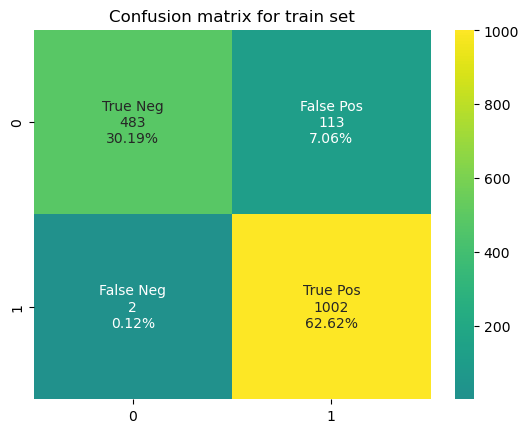

([0.92812, 0.89865, 0.99801, 0.94573],
 [1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
 

In [9]:
ModelEvaluator.evaluate(
    model=model_covid_v1,
    dataset=train_data,
    set_type="train"
)

#### 2.2 Test data

Accuracy:   0.85
Precision:  0.81126
Recall:     0.9879
F1 score:   0.89091




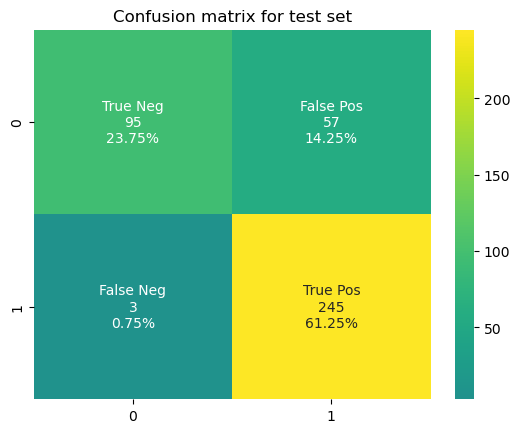

In [10]:
scores, y_true, y_pred = ModelEvaluator.evaluate(
    model=model_covid_v1,
    dataset=test_data,
    set_type="test"
)

In [11]:
test_data_correctly_predicted_model_v1 = ModelEvaluator.get_correctly_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

In [12]:
test_data_false_predicted_model_v1 = ModelEvaluator.get_false_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

## 3. Results Analyzing

#### 3.1 Polarity

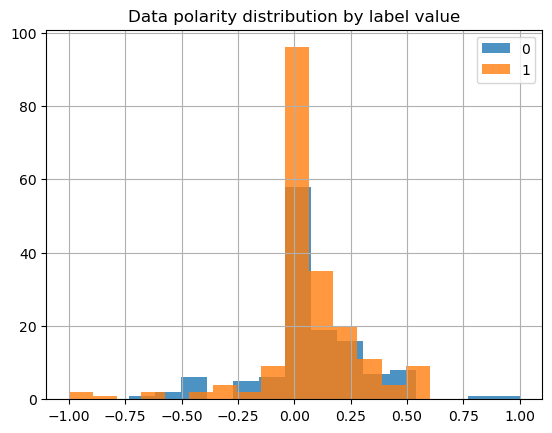

In [13]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_correctly_predicted_model_v1)

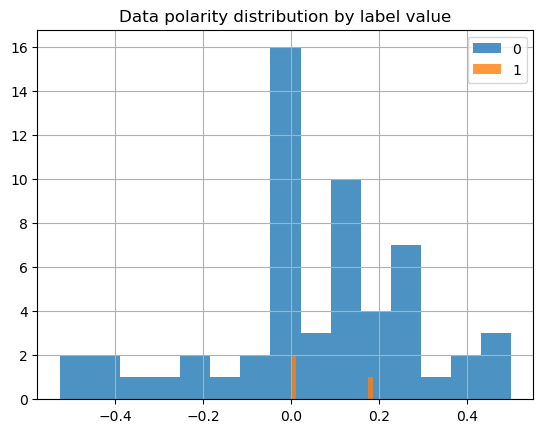

In [14]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.2 Subjectivity

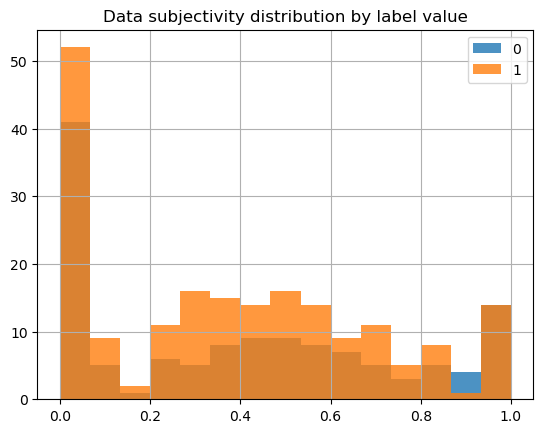

In [15]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_correctly_predicted_model_v1)

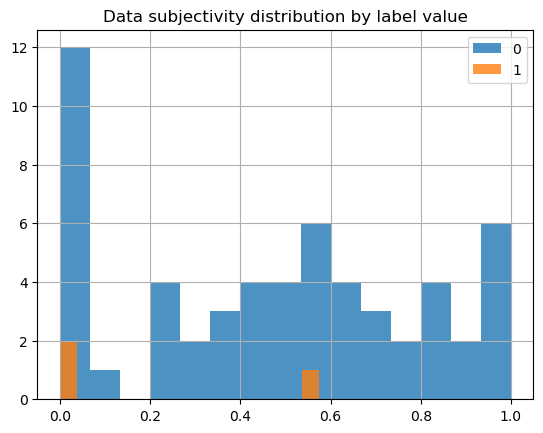

In [16]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.3 Most Popular Words map

In [17]:
most_popular_words_correct = DataAnalyzer.get_most_popular_words(
    dataset=test_data_correctly_predicted_model_v1,
    language="french",
    most_popular_words_num=100,
    label_type=None
)

In [18]:
most_popular_words_false = DataAnalyzer.get_most_popular_words(
    dataset=test_data_false_predicted_model_v1,
    language="french",
    most_popular_words_num=100,
    label_type=None
)

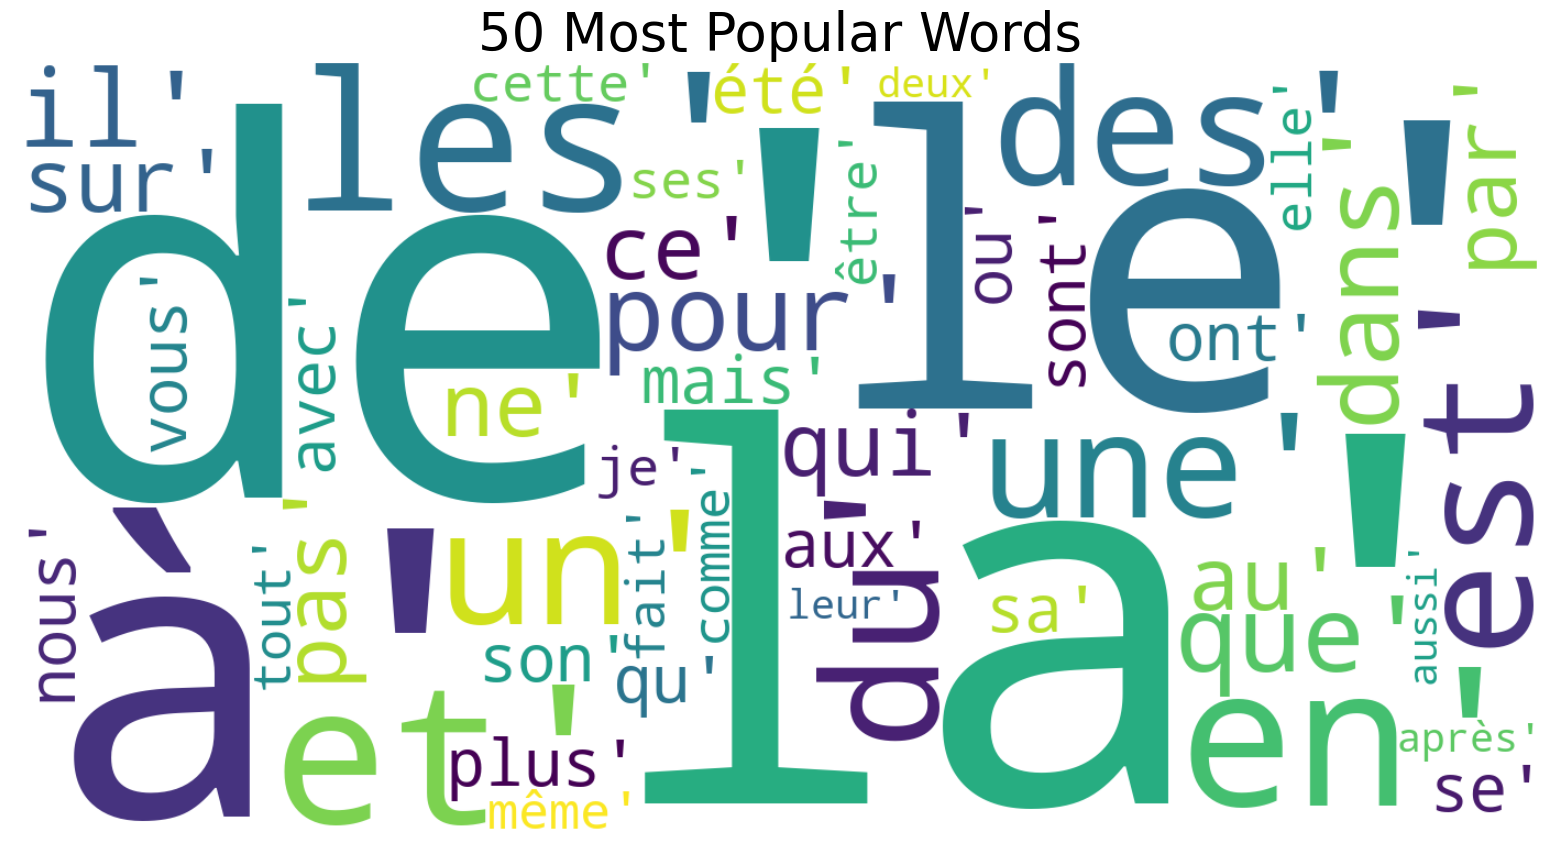

In [19]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=50,
    label_type=None
)

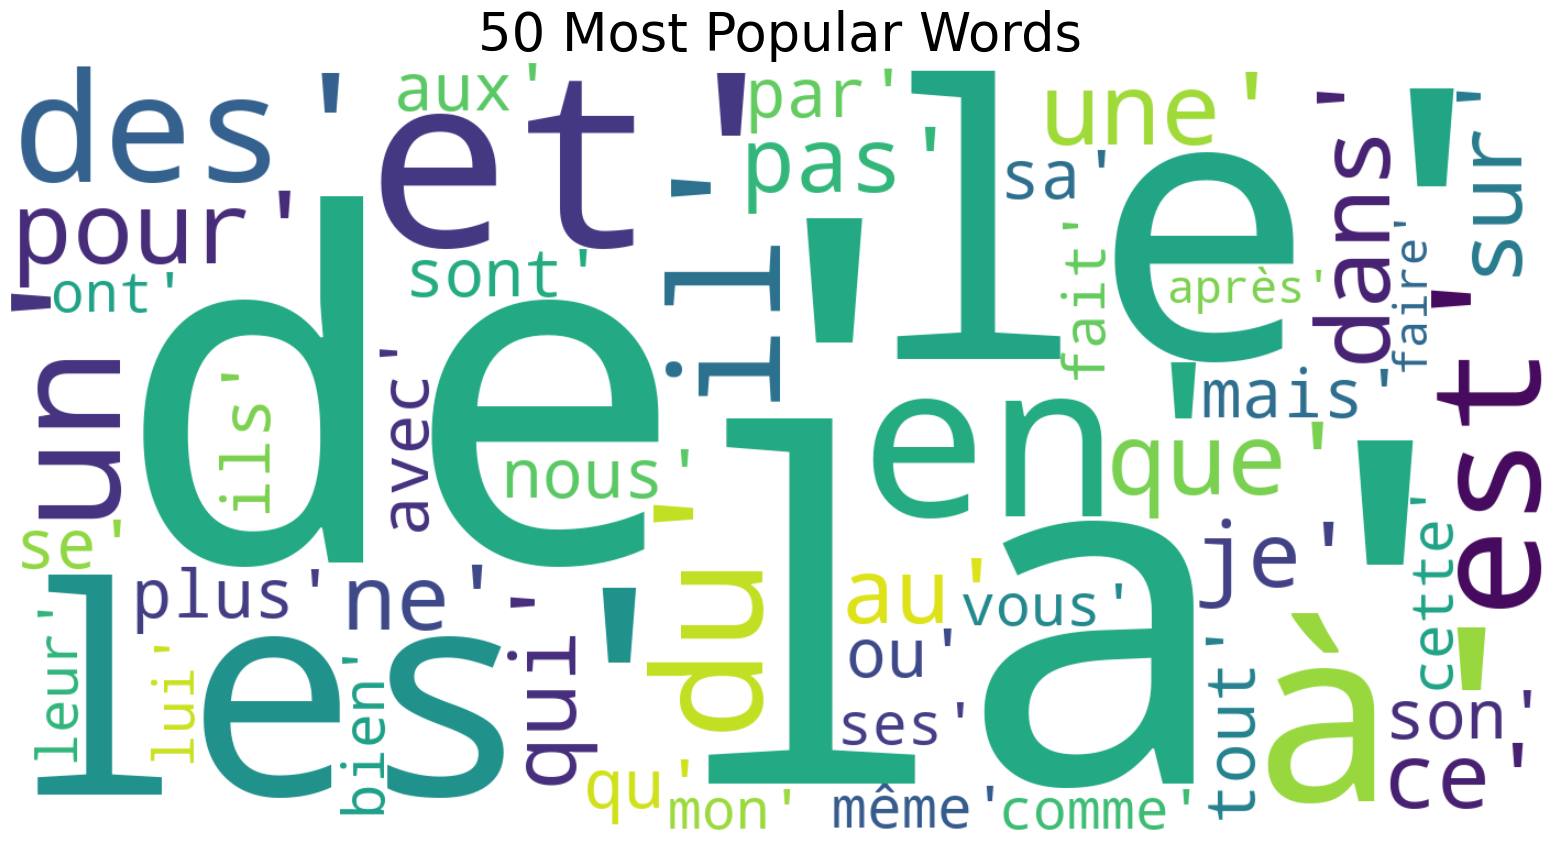

In [20]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=50,
    label_type=None
)

#### 3.4 Most Popular Words Histogram

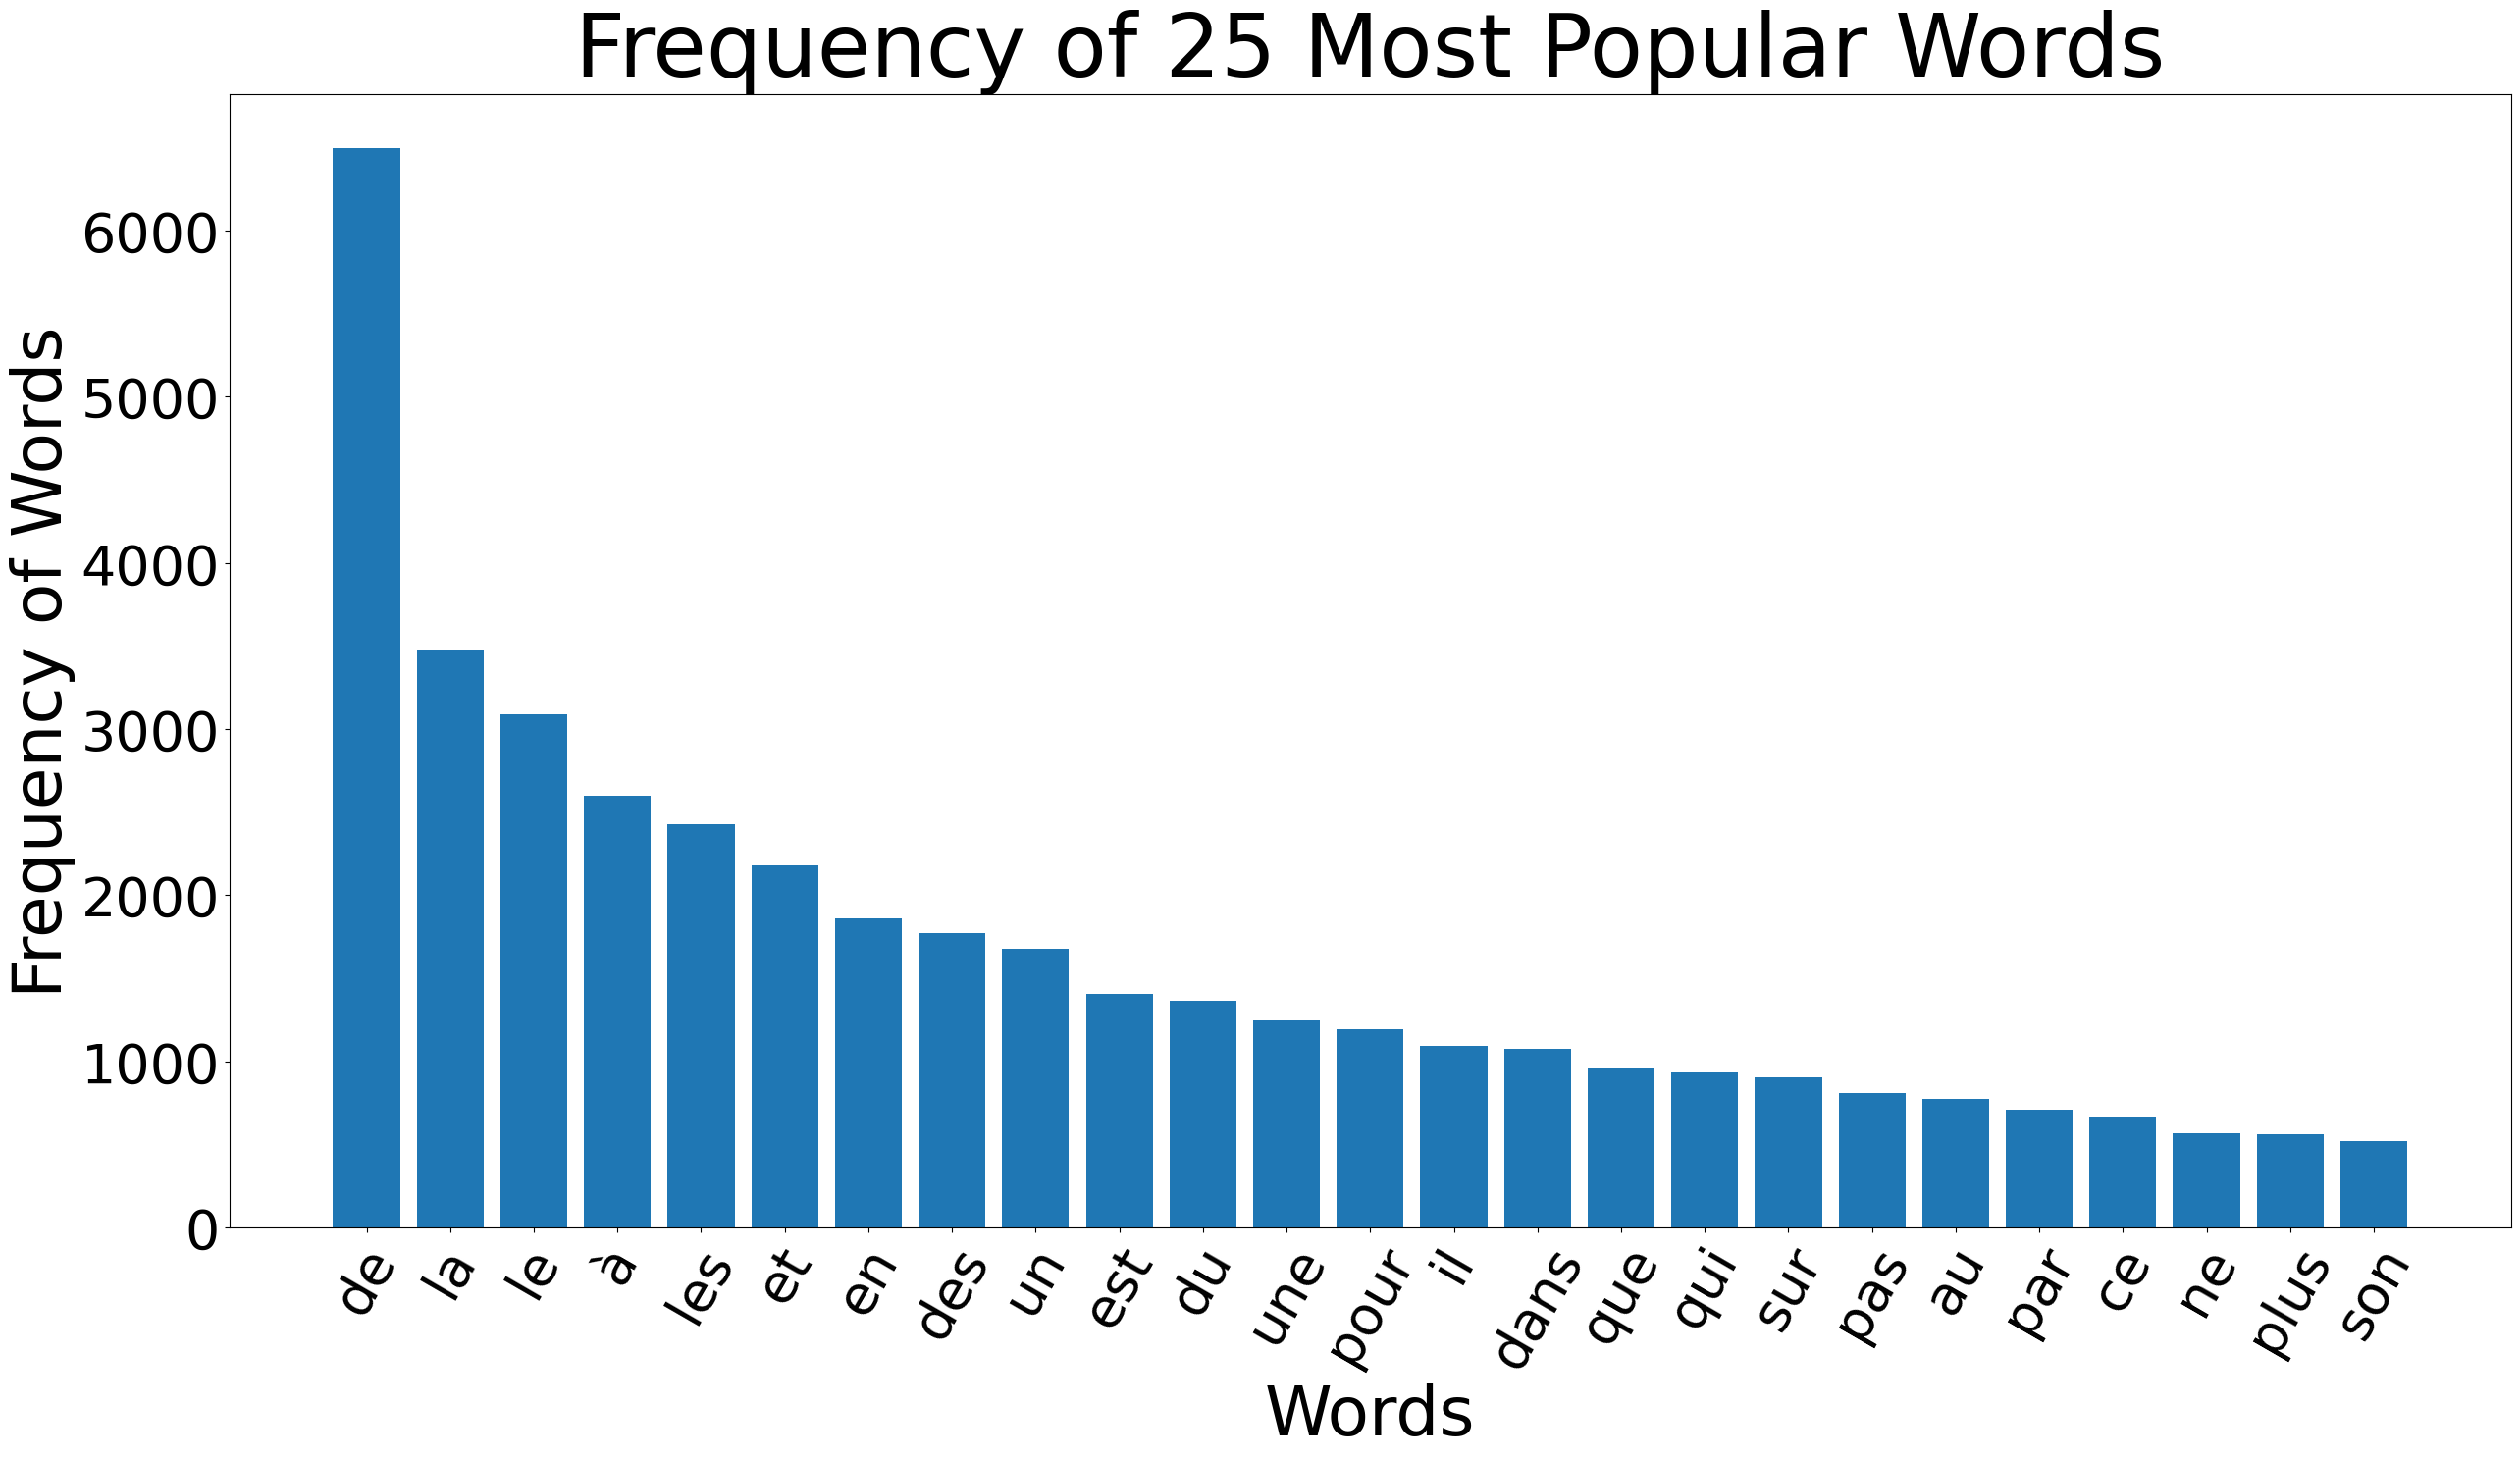

In [21]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=25,
    label_type=None
)

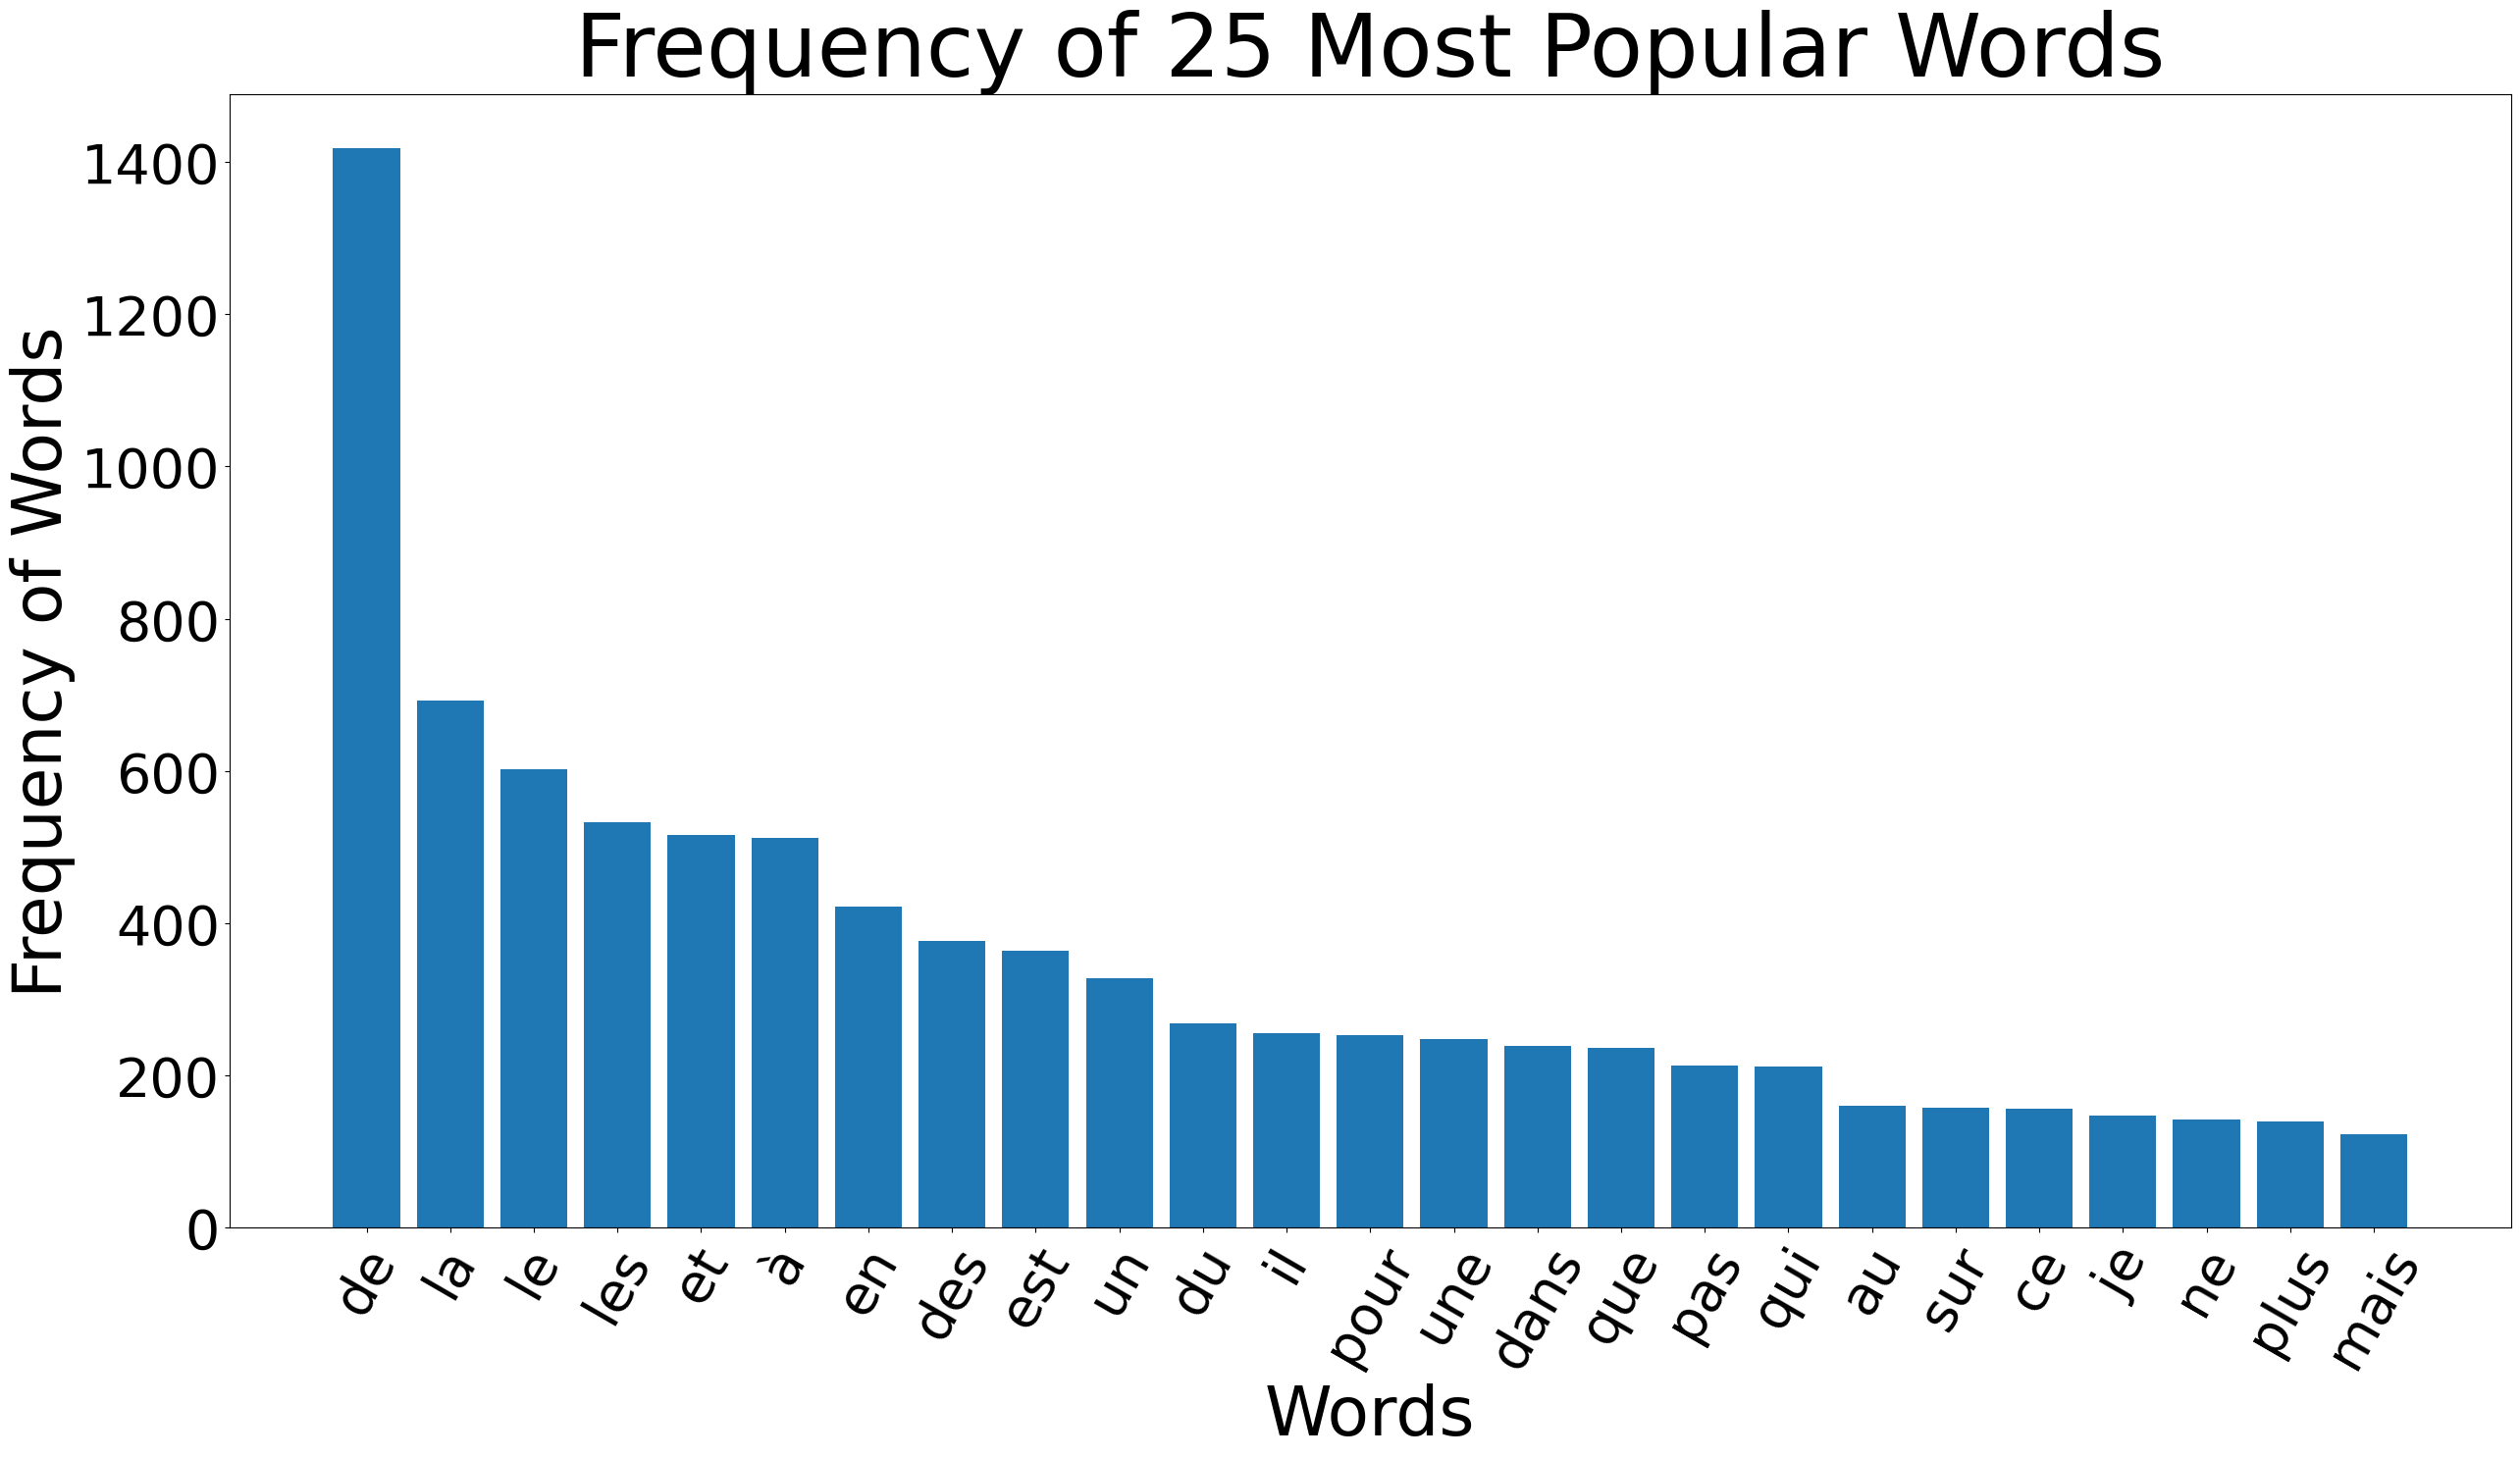

In [22]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=25,
    label_type=None
)

In [21]:
ACCURACY_TRAIN_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/french/accuracy_train_french.csv"
ACCURACY_VALIDATION_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/french/accuracy_validation_french.csv"
LOSS_TRAIN_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/french/loss_train_french.csv"
LOSS_VALIDATION_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/french/loss_validation_french.csv"

accuracy_train = pd.read_csv(ACCURACY_TRAIN_PATH)["Value"]
accuracy_validation = pd.read_csv(ACCURACY_VALIDATION_PATH)["Value"]
loss_train = pd.read_csv(LOSS_TRAIN_PATH)["Value"]
loss_validation = pd.read_csv(LOSS_VALIDATION_PATH)["Value"]

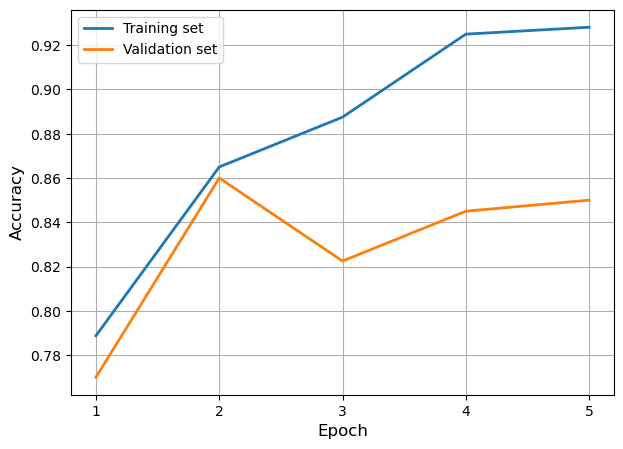

In [22]:
ModelEvaluator.plot_history(
    train_history=accuracy_train,
    validation_history=accuracy_validation,
    metric="Accuracy"
)

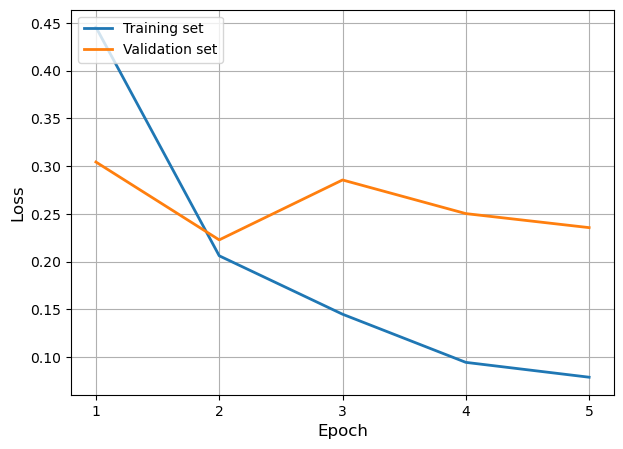

In [23]:
ModelEvaluator.plot_history(
    train_history=loss_train,
    validation_history=loss_validation,
    metric="Loss"
)